In [1]:
import igraph as ig
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
period = 'april2022'
full_graph_path = f'../../data/graphs/{period}_Lspace.graphml'
g = ig.Graph.Read(full_graph_path)

In [3]:
VISUAL_STYLE = {
    'layout': utils.layout_geo(g),
    'bbox': (0, 0, 1000, 1000),
}

# Network Analysis

### Average Degree

In [66]:
average_degree = g.ecount() / g.vcount()
average_degree

2.7406542056074765

### Degree distribution

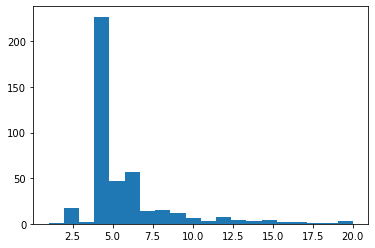

In [67]:
bins = len([val for bin1, bin2, val in g.degree_distribution().bins()])
plt.hist(g.degree(), bins)
plt.show()

### Diameter

In [68]:
g.diameter()

26

### Average path lenght/distance

In [69]:
g.average_path_length()

9.527041776129963

### Clustering coeff
Grado in cui i vicini di un dato nodo si collegano tra loro ([0-1]):
* 0: nessun collegamento tra i vicini
* 1: i vicini formano un grafo completo

Abbiamo molti nodi con grado basso ma coeff alto (spoke), quindi questi nodi fanno parte di una componente locale di vicinato molto densa, mentre i vicini degli hub sono molto più sparsi (parte bassa a destra).

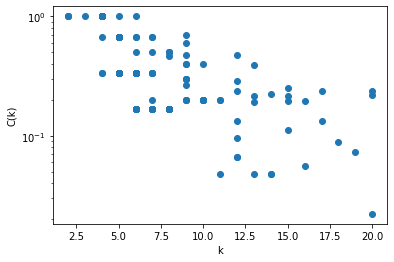

In [70]:
# TODO: Sarebbe più interessante al massimo verificarla per un nodo d'interesse
#g.transitivity_avglocal_undirected()

fig = plt.figure()
ax = plt.gca()
ax.scatter(g.degree(), g.transitivity_local_undirected())
ax.set_xlabel("k")
ax.set_ylabel("C(k)")
ax.set_yscale('log')
# ax.set_xscale('log')

# Importanza delle stazioni

### Degree centrality

In [71]:
indegree_centrality = np.array(g.degree(g.vs, mode="in-degree"))

vs = {
    **VISUAL_STYLE,
    'vertex_size': 3*np.array(indegree_centrality)+1,
    'vertex_label': ' '
}

print(f'Top 10 vertex by indegree_centrality:')
for i in utils.top_n_indices(indegree_centrality, 10):
    print(f"label: {g.vs[i]['label']}, indegree_centrality: {indegree_centrality[i]}")

# ig.plot(g, vertex_color = 'yellow', **vs)

Top 10 vertex by indegree_centrality:
label: MILANO LAMBRATE, indegree_centrality: 11
label: SARONNO, indegree_centrality: 10
label: RHO FIERA, indegree_centrality: 10
label: MONZA, indegree_centrality: 10
label: TREVIGLIO, indegree_centrality: 10
label: BRESCIA, indegree_centrality: 9
label: MILANO PORTA GARIBALDI, indegree_centrality: 9
label: MILANO ROGOREDO, indegree_centrality: 8
label: GALLARATE, indegree_centrality: 8
label: LECCO, indegree_centrality: 8


/tmp/ipykernel_599/4255316187.py:1: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  indegree_centrality = np.array(g.degree(g.vs, mode="in-degree"))


In [72]:
outdegree_centrality = np.array(g.degree(g.vs, mode="out-degree"))

vs = {
    **VISUAL_STYLE,
    'vertex_size': 3*np.array(outdegree_centrality)+1,
    'vertex_label': ' ',
    'edge_label': ''
}

print(f'Top 10 vertex by outdegree_centrality:')
for i in utils.top_n_indices(outdegree_centrality, 10):
    print(f"label: {g.vs[i]['label']}, outdegree_centrality: {outdegree_centrality[i]}")

# ig.plot(g, vertex_color = 'green', **vs)

Top 10 vertex by outdegree_centrality:
label: MONZA, outdegree_centrality: 10
label: SARONNO, outdegree_centrality: 10
label: BRESCIA, outdegree_centrality: 10
label: GALLARATE, outdegree_centrality: 9
label: MILANO LAMBRATE, outdegree_centrality: 9
label: CODOGNO, outdegree_centrality: 8
label: PAVIA, outdegree_centrality: 8
label: LECCO, outdegree_centrality: 8
label: TREVIGLIO, outdegree_centrality: 8
label: CALOLZIOCORTE OLGINATE, outdegree_centrality: 8


/tmp/ipykernel_599/4019041301.py:1: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  outdegree_centrality = np.array(g.degree(g.vs, mode="out-degree"))


In [73]:
weighted_in_centrality = np.array(g.strength(g.vs, mode="in", loops=True, weights=g.es['num_train']))

print(f'Top 10 vertex by weighted_in_centrality:')
for i in utils.top_n_indices(weighted_in_centrality, 10):
    print(f"label: {g.vs[i]['label']}, weighted_in_centrality: {int(weighted_in_centrality[i])}")

Top 10 vertex by weighted_in_centrality:
label: MILANO BOVISA FNM, weighted_in_centrality: 738
label: SARONNO, weighted_in_centrality: 527
label: MONZA, weighted_in_centrality: 352
label: MILANO DOMODOSSOLA, weighted_in_centrality: 348
label: MILANO PORTA VITTORIA, weighted_in_centrality: 347
label: MILANO REPUBBLICA, weighted_in_centrality: 347
label: MILANO PORTA VENEZIA, weighted_in_centrality: 347
label: MILANO DATEO, weighted_in_centrality: 347
label: MILANO PORTA GARIBALDI SOTTERRANEA, weighted_in_centrality: 347
label: MILANO LANCETTI, weighted_in_centrality: 346


In [74]:
weighted_out_centrality = np.array(g.strength(g.vs, mode="out", loops=True, weights=g.es['num_train']))

print(f'Top 10 vertex by weighted_out_centrality:')
for i in utils.top_n_indices(weighted_out_centrality, 10):
    print(f"label: {g.vs[i]['label']}, weighted_out_centrality: {int(weighted_out_centrality[i])}")

Top 10 vertex by weighted_out_centrality:
label: MILANO BOVISA FNM, weighted_out_centrality: 733
label: SARONNO, weighted_out_centrality: 532
label: MONZA, weighted_out_centrality: 352
label: MILANO DOMODOSSOLA, weighted_out_centrality: 348
label: MILANO DATEO, weighted_out_centrality: 348
label: MILANO PORTA VITTORIA, weighted_out_centrality: 347
label: MILANO REPUBBLICA, weighted_out_centrality: 347
label: MILANO PORTA VENEZIA, weighted_out_centrality: 347
label: MILANO PORTA GARIBALDI SOTTERRANEA, weighted_out_centrality: 347
label: MILANO LANCETTI, weighted_out_centrality: 346


### Betweenness centrality

In [75]:
betweeness = np.array(g.betweenness(directed=True))
norm_btwness = (betweeness - betweeness.min()) / (betweeness.max() - betweeness.min()) 

vs = {
    **VISUAL_STYLE,
    'vertex_size': 50*norm_btwness
}

print(f'Top 10 vertex by betweenness (normalized):')
for i in utils.top_n_indices(norm_btwness, 10):
    print(f"label: {g.vs[i]['label']}, betweeness: {norm_btwness[i]}")

# ig.plot(g, **vs)

Top 10 vertex by betweenness (normalized):
label: MILANO LAMBRATE, betweeness: 1.0
label: MILANO ROGOREDO, betweeness: 0.7863961292274942
label: MONZA, betweeness: 0.77003784379373
label: MILANO CENTRALE, betweeness: 0.6256446891017553
label: TREVIGLIO, betweeness: 0.5527981125491678
label: LECCO, betweeness: 0.5071597956744601
label: MILANO PORTA GARIBALDI, betweeness: 0.475885434347367
label: RHO FIERA, betweeness: 0.4434781021500448
label: MILANO BOVISA FNM, betweeness: 0.44309634516137064
label: BRESCIA, betweeness: 0.426197251601166


In [76]:
w_betweeness = np.array(g.betweenness(directed=True, weights=g.es['num_train']))
norm_w_btwness = (w_betweeness - w_betweeness.min()) / (w_betweeness.max() - w_betweeness.min())

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5*w_betweeness
}

print(f"Top 10 vertex by 'num_train' weighted betweenness (normalized):")
for i in utils.top_n_indices(norm_w_btwness, 10):
    print(f"label: {g.vs[i]['label']}, betweeness: {norm_w_btwness[i]}")

#ig.plot(g, **vs)

Top 10 vertex by 'num_train' weighted betweenness (normalized):
label: MILANO LAMBRATE, betweeness: 1.0
label: MILANO CENTRALE, betweeness: 0.7820126606307207
label: MILANO VILLAPIZZONE, betweeness: 0.73347061396631
label: RHO FIERA, betweeness: 0.685394881275637
label: TREVIGLIO, betweeness: 0.6815983427283907
label: MILANO GRECO PIRELLI, betweeness: 0.6635854179906407
label: BRESCIA, betweeness: 0.592307470102259
label: MILANO ROGOREDO, betweeness: 0.5905185576454859
label: MONZA, betweeness: 0.5485956934047523
label: LECCO, betweeness: 0.5082120779445871


### Closeness

In [77]:
closeness = np.array(g.closeness())

for i in utils.top_n_indices(closeness, 10):
    print(f"label {i}: {g.vs[i]['label']}, closeness: {closeness[i]}")


#VISUAL_STYLE["edge_arrow_size"] = 0.1
#VISUAL_STYLE["vertex_size"] = 1000*closeness + 1
#ig.plot(g, main="Closeness in G", vertex_label = ' ',edge_label = ' ', **VISUAL_STYLE)

label 352: MILANO CENTRALE, closeness: 0.1960514233241506
label 189: MILANO LAMBRATE, closeness: 0.19191011235955055
label 131: MILANO ROGOREDO, closeness: 0.18736287845546293
label 105: MILANO PORTA GARIBALDI, closeness: 0.18500866551126516
label 21: MILANO GRECO PIRELLI, closeness: 0.1829477292202228
label 299: RHO FIERA, closeness: 0.18177948063005533
label 214: MILANO VILLAPIZZONE, closeness: 0.1800927878532265
label 98: MONZA, closeness: 0.17911073825503357
label 373: SESTO S.GIOVANNI, closeness: 0.17888563049853373
label 111: TREVIGLIO, closeness: 0.17644628099173554


In [78]:
weighted_closeness = np.array(g.closeness(weights=g.es['num_train']))
for i in utils.top_n_indices(weighted_closeness, 10):
    print(f"label {i}: {g.vs[i]['label']}, closeness: {weighted_closeness[i]}")


#VISUAL_STYLE["edge_arrow_size"] = 0.1
#VISUAL_STYLE["vertex_size"] = 1000*closeness_nodes
# ig.plot(g, main="Closeness in G", vertex_label = ' ',edge_label = ' ', **VISUAL_STYLE)

label 352: MILANO CENTRALE, closeness: 0.016428312319310547
label 373: SESTO S.GIOVANNI, closeness: 0.016414328627050428
label 21: MILANO GRECO PIRELLI, closeness: 0.01640054869684499
label 131: MILANO ROGOREDO, closeness: 0.016292912664755195
label 189: MILANO LAMBRATE, closeness: 0.01628980483843719
label 214: MILANO VILLAPIZZONE, closeness: 0.01627428347417022
label 290: MILANO CERTOSA, closeness: 0.016239269803325
label 98: MONZA, closeness: 0.01623635879691243
label 356: CARNATE USMATE, closeness: 0.016210558285336202
label 59: LISSONE-MUGGIO', closeness: 0.016179758250918882


### Pagerank

In [79]:
pr = np.array(g.pagerank(directed=True))

print(f"Top 10 vertex by pagerank:")
for i in utils.top_n_indices(pr, 10):
    print(f"label: {g.vs[i]['label']}, pagerank: {pr[i]}")

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5000*pr,
    'vertex_label': ' '
}

# ig.plot(g, **vs)

Top 10 vertex by pagerank:
label: TREVIGLIO, pagerank: 0.007551068378624917
label: SARONNO, pagerank: 0.0074271227478676215
label: MILANO LAMBRATE, pagerank: 0.007272373359052889
label: PAVIA, pagerank: 0.006805288268587343
label: BRESCIA, pagerank: 0.006264685785181577
label: MILANO ROGOREDO, pagerank: 0.006191291543844073
label: MORTARA, pagerank: 0.0061755935354859525
label: COLICO, pagerank: 0.005628785571451949
label: MONZA, pagerank: 0.005522750940087795
label: VERBANIA-PALLANZA, pagerank: 0.005448886269366474


In [80]:
weighted_pr = np.array(g.pagerank(directed=True, weights=g.es['num_train']))

print(f"Top 10 vertex by pagerank:")
for i in utils.top_n_indices(weighted_pr, 10):
    print(f"label: {g.vs[i]['label']}, weighted_pagerank: {weighted_pr[i]}")

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5000*pr,
    'vertex_label': ' '
}

# ig.plot(g, **vs)

Top 10 vertex by pagerank:
label: MILANO BOVISA FNM, weighted_pagerank: 0.007086159132347378
label: SARONNO, weighted_pagerank: 0.006600921252442274
label: VERBANIA-PALLANZA, weighted_pagerank: 0.0061947699473571816
label: PAVIA, weighted_pagerank: 0.006161238374375925
label: GALLARATE, weighted_pagerank: 0.0060570648126080885
label: MONZA, weighted_pagerank: 0.005903788553459938
label: MILANO ROGOREDO, weighted_pagerank: 0.005880737974968031
label: BRESCIA, weighted_pagerank: 0.005429114106146652
label: CESANO MADERNO, weighted_pagerank: 0.005128811776865061
label: MILANO LAMBRATE, weighted_pagerank: 0.004891648763915736


### Save tables

In [81]:
def station_extraction(l):
    stations = []
    for i in l:
        for station in utils.top_n_indices(i, 10):
            stations.append(g.vs[station]['label'])
    return list(set(stations))  

In [82]:
def populate_df(station, column, df, l):
    index_name=0
    for val in l:
        list_to_append = []
        for name in station:
            for i in utils.top_n_indices(val, len(val)):
                if i == g.vs.find(label = name).index:
                    if type(val[i]) == int:
                        list_to_append.append(val[i])
                    else:
                        list_to_append.append(round(val[i],4))
        df[column[index_name]] = list_to_append
        index_name = index_name + 1
    return df

In [83]:
def table_write(table, weighted):
    if weighted == True:
        full_table_path = f'../../data/tables/{period}_weighted_centrality_table.xls'
        with pd.ExcelWriter(full_table_path) as writer:
            table.to_excel(writer, sheet_name='new_sheet1')
    else:
        full_table_path = f'../../data/tables/{period}_centrality_table.xls'
        with pd.ExcelWriter(full_table_path) as writer:
            table.to_excel(writer, sheet_name='new_sheet1')

In [84]:
column_names = ['Indegree centrality', 'Outdegree centrality', 'Betweeness', 'Closeness', 'Pagerank']


In [85]:
stations = [] 
values = [indegree_centrality, outdegree_centrality, norm_btwness, closeness, pr]
stations = station_extraction(values)
stations.sort()
table = pd.DataFrame({'Names' : stations})
table = populate_df(stations, column_names, table, values)
table_write(table, False)

/tmp/ipykernel_599/2831359715.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  with pd.ExcelWriter(full_table_path) as writer:


In [86]:
w_stations = []
w_values = [weighted_in_centrality, weighted_out_centrality, w_betweeness, weighted_closeness, weighted_pr]
w_stations = station_extraction(w_values)
w_stations.sort()
w_table = pd.DataFrame({'Names' : w_stations})
w_table = populate_df(w_stations, column_names, w_table, w_values)
table_write(w_table, True)

/tmp/ipykernel_599/2831359715.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  with pd.ExcelWriter(full_table_path) as writer:


## Visualization

In [79]:
VISUAL_STYLE_visualization = {
    'layout': 'kk',
    'bbox': (0, 0, 1000, 1000),
}

In [87]:
n = g.neighborhood(vertices=g.vs.select(label = "MILANO LAMBRATE"), order=2)
sub_g = g.subgraph(vertices=n[0])
sub_g.vs.select(label = "MILANO LAMBRATE")[0]['color'] = 'yellow'
sub_g.es.select( _source = sub_g.vs.select(label = 'MILANO LAMBRATE')[0].index)['color'] = 'blue'
sub_g.es.select( _target = sub_g.vs.select(label = 'MILANO LAMBRATE')[0].index)['color'] = 'green'

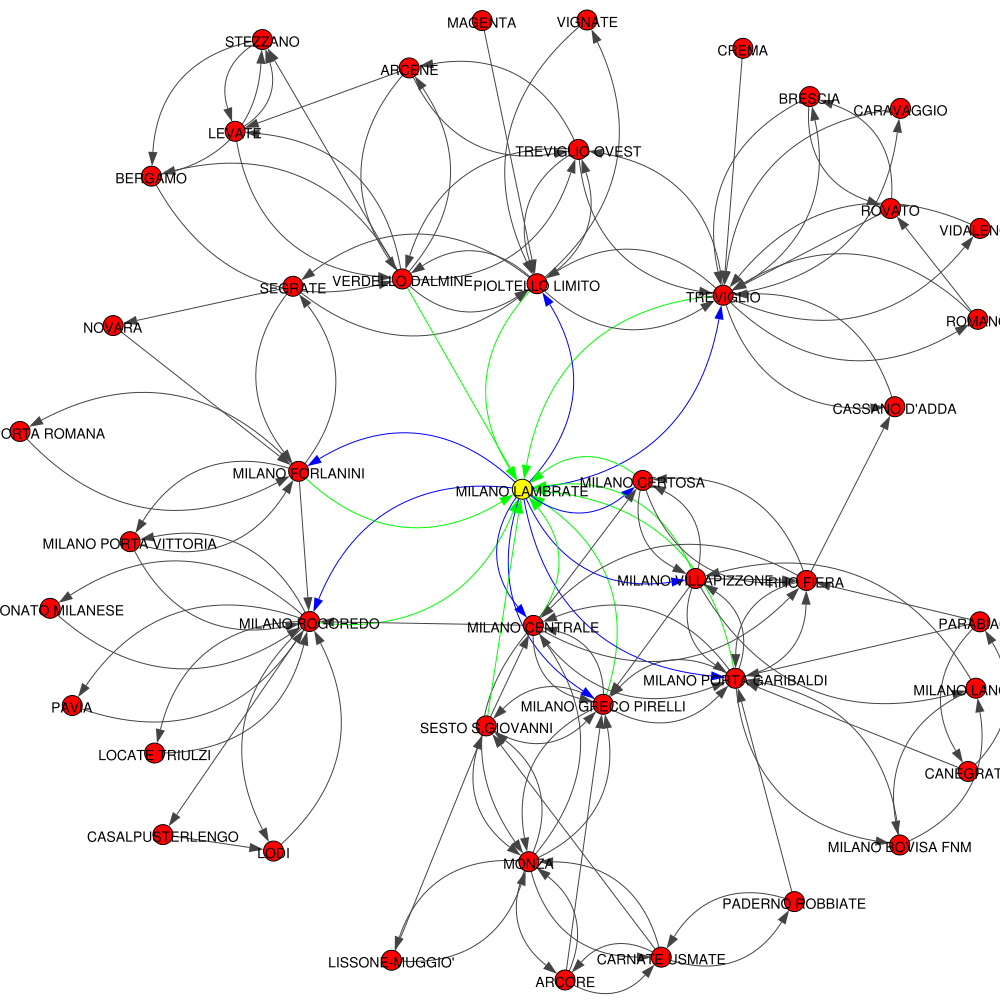

In [88]:
ig.plot(sub_g, **VISUAL_STYLE_visualization)

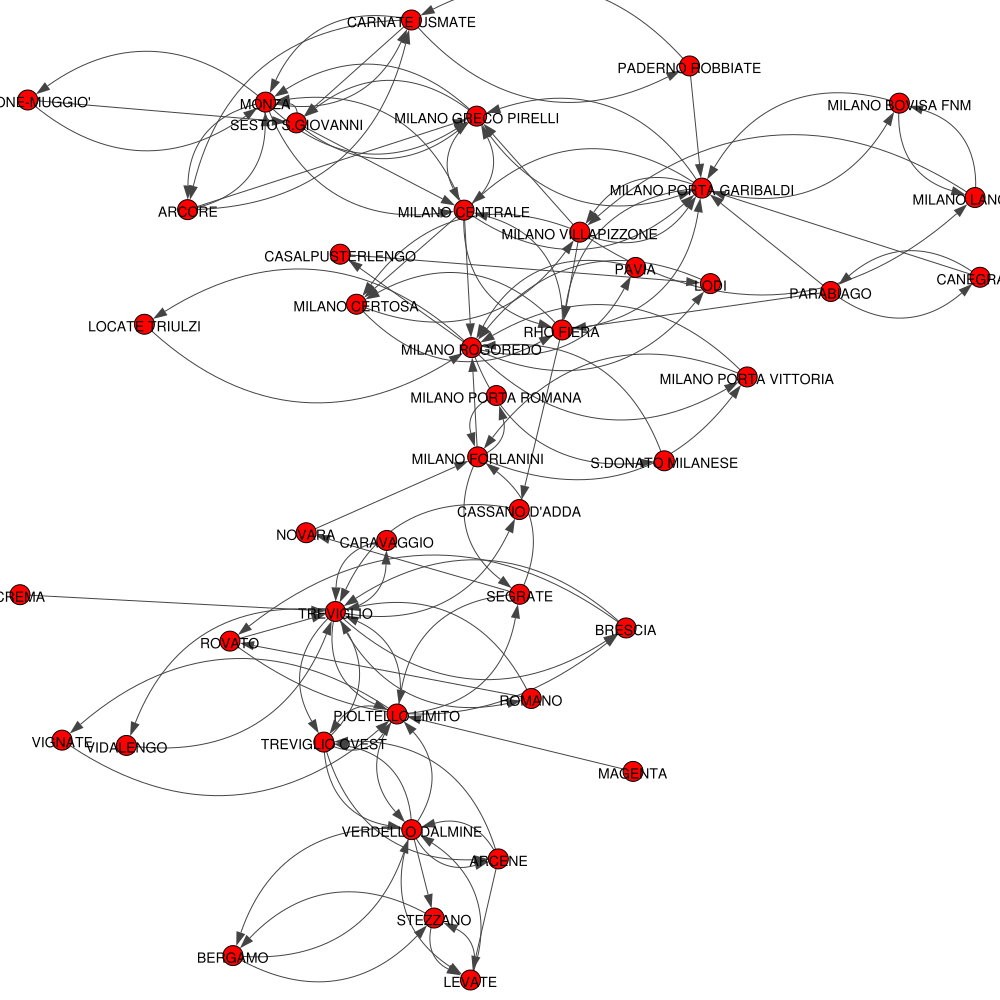

In [89]:
sub_g.delete_vertices(sub_g.vs.select(label = "MILANO LAMBRATE"))
ig.plot(sub_g, **VISUAL_STYLE_visualization)